In [1]:
"""
About: A simple functioning Deep Learning model with trainining and validaion following 5.2 until 5.4.1 section of Deep Learning with Python
#Dropout needs to be added
#Data Augmentation needs to be added
#Though it shows what is going on with the image. And accuracy is too good to be true between train and
#To do: plot testing and plot an image with an ROI on the testing image
"""


# SETTING UP TENSORFLOW AND KERAS
import sys;print('python version:',sys.version)
import tensorflow as tf; print('tf_version:',tf.__version__) #tf: 2.1
from tensorflow import keras; print('keras version:',keras.__version__)
from tensorflow.python.platform import build_info as tf_build_info
print('CUDA Version:',tf_build_info.cuda_version_number)
print('CUDNN Version:',tf_build_info.cudnn_version_number)


import os, shutil
original_dataset_dir="C:\\Users\\osama\\Documents\\opus_shuffled3" #has all unsorted images

####Create train, validation and test folders and sub-folders. Keras needs sub-folders:https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
# Create a Test Dir##### #create a folder "train": os.path.join gets path and the name of the new directory#os.mkdir(directory_name_path) makes it#You have to error check whether the folder already exist
train_dir = os.path.join(original_dataset_dir, 'train') 
if os.path.exists(train_dir):
    pass #does nothing
else :
    os.mkdir(train_dir)

train_sub_dir = os.path.join(train_dir, 'train_sub') 
if os.path.exists(train_sub_dir):
    pass #does nothing
else :
    os.mkdir(train_sub_dir)
    
# #####Create a Validation Dir#####
validation_dir = os.path.join(original_dataset_dir, 'validation') 
if os.path.exists(validation_dir):
    pass #does nothing
else :
    os.mkdir(validation_dir)

validation_sub_dir = os.path.join(validation_dir, 'validation_sub') 
if os.path.exists(validation_sub_dir):
    pass #does nothing
else :
    os.mkdir(validation_sub_dir)

# ####Create a Test Dir#####
test_dir = os.path.join(original_dataset_dir, 'test') 
if os.path.exists(test_dir):
    pass #does nothing
else :
    os.mkdir(test_dir)

test_sub_dir = os.path.join(test_dir, 'test_sub') 
if os.path.exists(test_sub_dir):
    pass #does nothing
else :
    os.mkdir(test_sub_dir)
    

####5.2.2 - Images are Not Randomly Saved. Copies images from main folder to respective train,val and test #####
#Train
fnames = ['img ({}).jpg'.format(i) for i in range(1,161)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_sub_dir, fname)
    shutil.copyfile(src, dst)
#Validation
fnames = ['img ({}).jpg'.format(i) for i in range(161,181)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_sub_dir, fname)
    shutil.copyfile(src, dst)
#Test
fnames = ['img ({}).jpg'.format(i) for i in range(181,201)] #range(start, stop-1)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_sub_dir, fname)
    shutil.copyfile(src, dst)

print('train images: ',len(os.listdir(train_sub_dir)))
print('val images: ',len(os.listdir(validation_sub_dir)))
print('test images: ',len(os.listdir(test_sub_dir)))

####Building a convnet#####
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

#Configure or Compile#
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
tf_version: 2.1.0
keras version: 2.2.4-tf
CUDA Version: 10.1
CUDNN Version: 7.6
train images:  160
val images:  20
test images:  20
Model: "sequential_1"

Using TensorFlow backend.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
_________

Found 160 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Epoch 1/3
3/3 [==============================] - 20s 7s/step - loss: 0.3492 - acc: 0.8833 - val_loss: 0.0285 - val_acc: 1.0000
Epoch 2/3
3/3 [==============================] - 12s 4s/step - loss: 0.0186 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 3/3
3/3 [==============================] - 13s 4s/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000


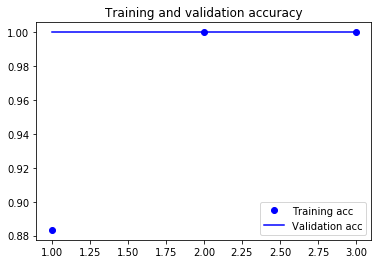

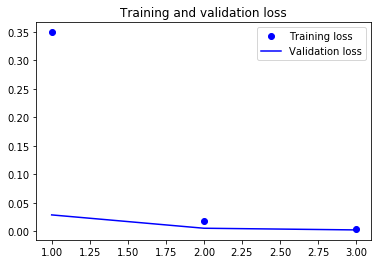

(1, 150, 150, 3)


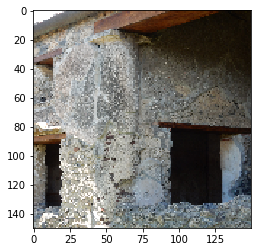

C:\Users\osama\anaconda3\envs\Mar2020\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in true_divide


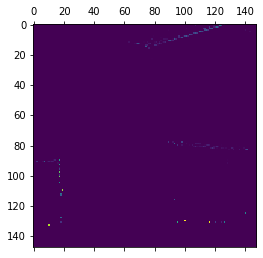

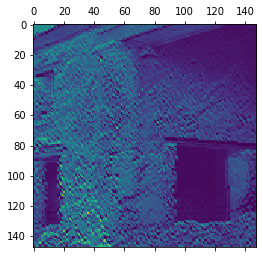

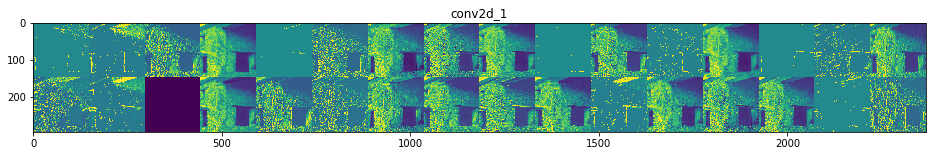

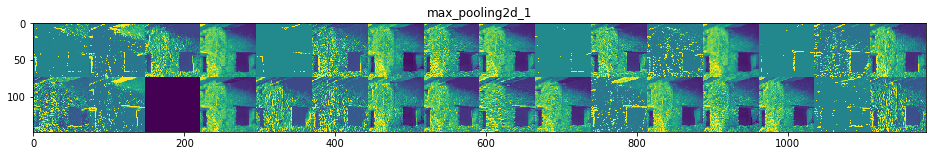

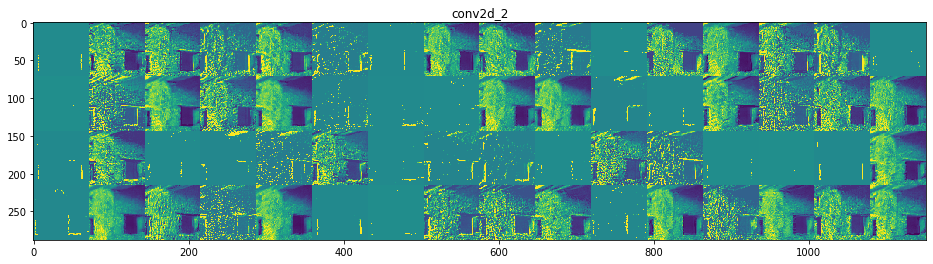

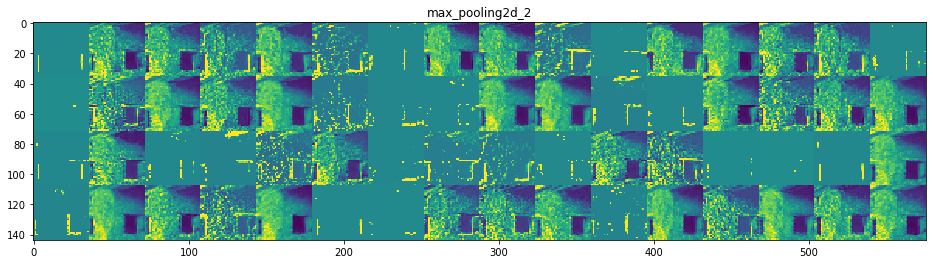

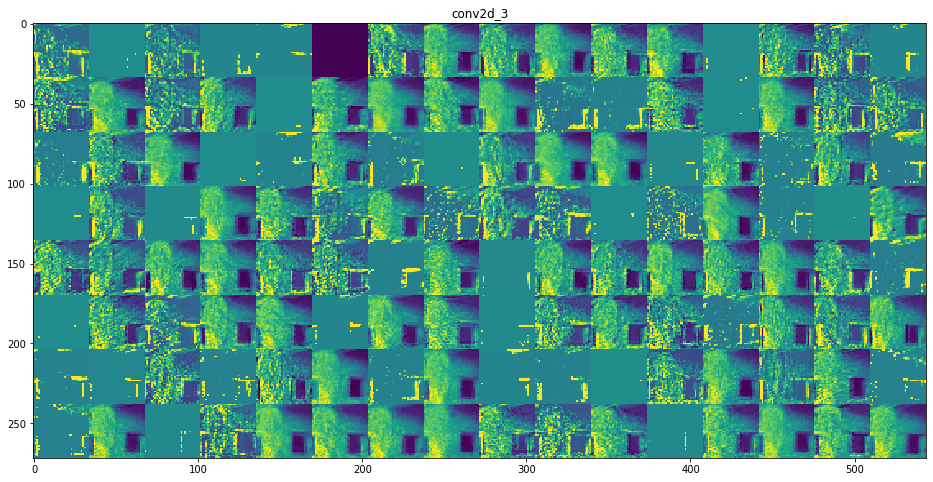

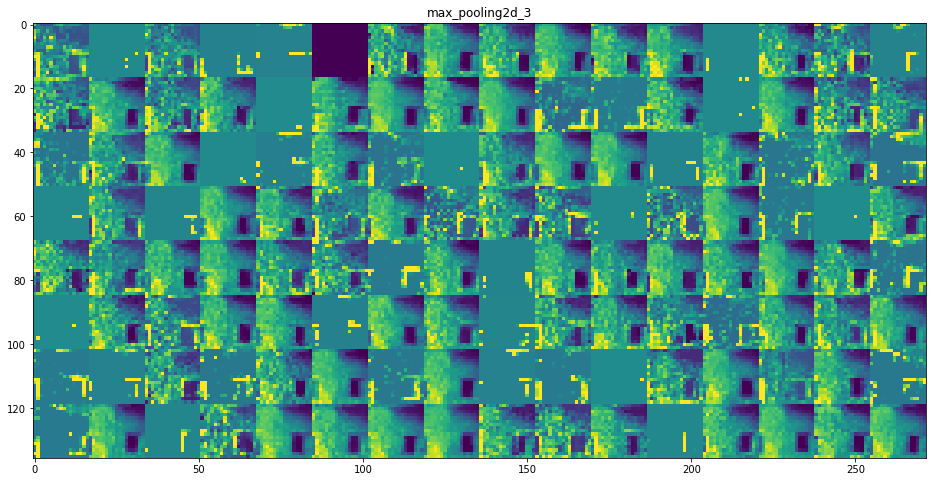

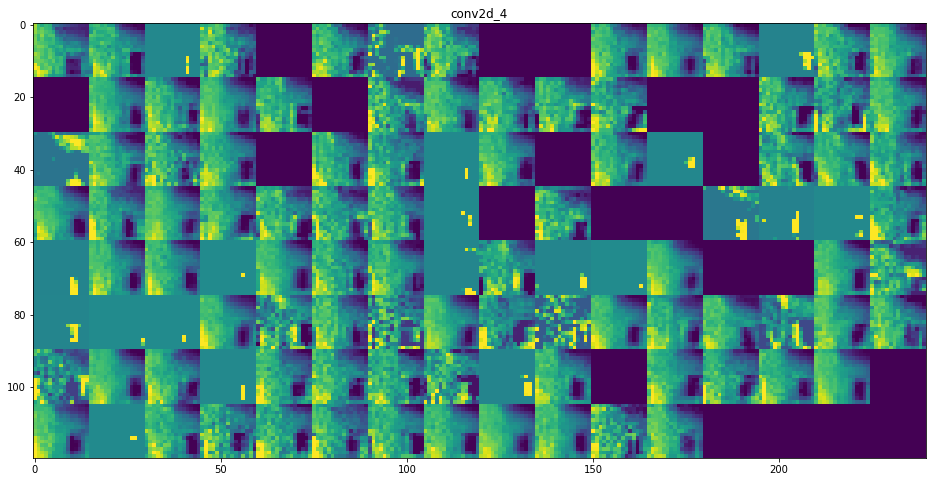

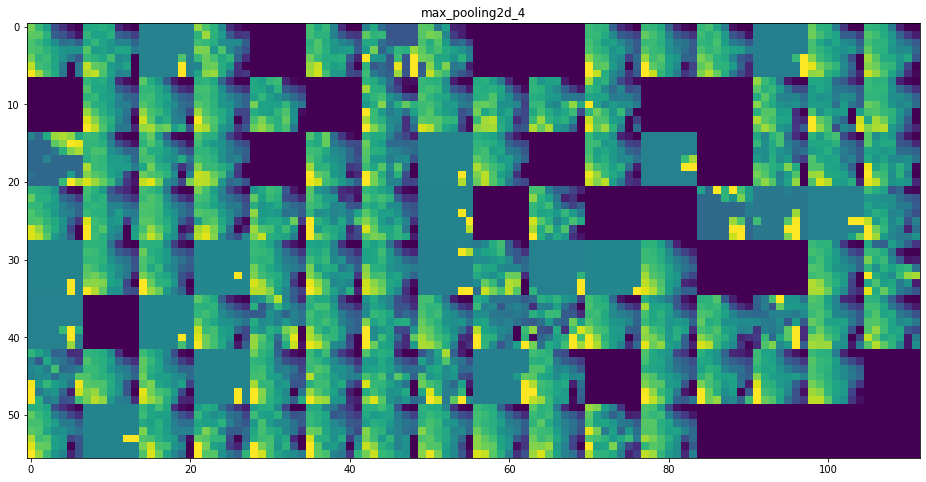

In [2]:
from keras.preprocessing.image import ImageDataGenerator
#Training of images
train_datagen = ImageDataGenerator(rescale=1./255)#RESCALE IMAGES
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150), #RESIZE
        batch_size=20,
        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


#COMPILING OR FITTING THE MODEL USING THE BATCH GENERATOR
history = model.fit_generator(
      train_generator,
      steps_per_epoch=3,
      epochs=3,
      validation_data=validation_generator,
      validation_steps=3)



#SAVE THE MODEL
#model.save('opus_v4.h5')

#CHECK THE ACCURACY
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##### TEST #####
import matplotlib.image as mpimg
#Give the right image path. Seems like \\ is required for the path in python
img_path = 'C:\\Users\\osama\\Documents\\opus_shuffled3\\img (194).JPG'
a= mpimg.imread(img_path)
plt.imshow(a)

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

#Listing 5.27. Instantiating a model from an input tensor and a list of output tensors 
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)


from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]

    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
####5.4.1 ends here###

In [16]:
#Set up the directory
new_dir = "C:\\Users\\osama\\Desktop\\DATA 5000\\PROJECT\\code\\rcnn"
%cd $new_dir


SyntaxError: invalid syntax (<ipython-input-16-33ae2d954126>, line 4)

In [1]:
!python -V

Python 3.7.6


In [26]:
!echo %cd%

C:\Users\osama\Mask_RCNN


In [13]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...


In [3]:
#if not /home/student/data_5000_project/programs/R-CNN/Mask_RCNN
%cd Mask_RCNN

C:\Users\osama\Mask_RCNN


In [13]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info\PKG-INFO
writing dependency_links to mask_rcnn.egg-info\dependency_links.txt
writing top-level names to mask_rcnn.egg-info\top_level.txt
writing manifest file 'mask_rcnn.egg-info\SOURCES.txt'
reading manifest file 'mask_rcnn.egg-info\SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
creating build
creating build\lib
creating build\lib\mrcnn
copying mrcnn\config.py -> build\lib\mrcnn
copying mrcnn\model.py -> build\lib\mrcnn
copying mrcnn\parallel_model.py -> build\lib\mrcnn
copying mrcnn\utils.py -> build\lib\mrcnn
copying mrcnn\visualize.py -> build\lib\mrcnn
copying mrcnn\__init__.py -> build\lib\mrcnn
creating build\bdist.win-amd64
creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\mrcnn
copying build\lib\mrcnn\con

zip_safe flag not set; analyzing archive contents...


In [6]:
!pip install scikit-image

In [25]:
!pip show mask-rcnn
!echo %cd%

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: c:\users\osama\anaconda3\envs\mar2020\lib\site-packages\mask_rcnn-2.1-py3.7.egg
Requires: 
Required-by: 
C:\Users\osama\Mask_RCNN


In [58]:
# split into train and test set
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset

# class that defines and loads the opus_incertum dataset
class ObjectDataset(Dataset):
    # load the dataset definitions
    def load_dataset(self, dataset_dir, is_train=True):
        # define one class
        self.add_class("dataset", 1, "opus_incertum")
        # define data locations
        images_dir = dataset_dir + '\\images\\'
        annotations_dir = dataset_dir + '\\annots\\'
        # find all images
        for filename in listdir(images_dir):
            # extract image id
            image_id = filename[:-4]
            
            # skip all images after 400 if we are building the train set
            if is_train and int(image_id) >= 160:
                continue
            # skip all images before 400 if we are building the test/val set
            if not is_train and int(image_id) < 160:
                continue
            img_path = images_dir + filename
            ann_path = annotations_dir + image_id + '.xml'
            # add to dataset
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)

    # extract bounding boxes from an annotation file
    def extract_boxes(self, filename):
        # load and parse the file
        tree = ElementTree.parse(filename)
        # get the root of the document
        root = tree.getroot()
        # extract each bounding box
        boxes = list()
        for box in root.findall('.//bndbox'):
            xmin = int(box.find('xmin').text)
            ymin = int(box.find('ymin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)
            coors = [xmin, ymin, xmax, ymax]
            boxes.append(coors)
        # extract image dimensions
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height

    # count bounding boxes from an annotation file
    def count_boxes(self, filename):
        # load and parse the file
        tree = ElementTree.parse(filename)
        # get the root of the document
        root = tree.getroot()
        # extract each bounding box
        boxes = list()
        box_count=0
        for box in root.findall('.//bndbox'):
            box_count=box_count+1
        return box_count

    
    # load the masks for an image
    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        # define box file location
        path = info['annotation']
        # load XML
        boxes, w, h = self.extract_boxes(path)
        # create one array for all masks, each on a different channel
        masks = zeros([h, w, len(boxes)], dtype='uint8')
        # create masks
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('opus_incertum'))
        return masks, asarray(class_ids, dtype='int32')

    # load an image reference
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

# train set
train_set = ObjectDataset()
# opus_incertum - change
ObjectDataset().load_dataset('C:\\Users\\osama\\Desktop\\del\\1.jpg', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))
"""
# test/val set
test_set = ObjectDataset()
# opus_incertum - change
test_set.load_dataset('/home/student/data_5000_project/data/images/construction_types/processed/opus_incertum', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))
"""

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\osama\\Desktop\\del\\1.jpg\\images\\'

In [41]:
# plot one photograph and mask
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
from matplotlib import pyplot


# train set
train_set = ObjectDataset()
#opus_incertum
train_set.load_dataset('C:\\Users\\osama\\Documents\\opus_shuffled3\\img (194).JPG', is_train=True)
train_set.prepare()
# load an image
image_id = 8
image = train_set.load_image(image_id)
print(image.shape)
# load image mask
mask, class_ids = train_set.load_mask(image_id)
print(mask.shape)
# plot image
pyplot.imshow(image)
# plot mask
pyplot.imshow(mask[:, :, 0], cmap='gray', alpha=0.5)
pyplot.show()


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\osama\\Documents\\opus_shuffled3\\img (194).JPG\\images\\'

In [5]:
# display image with masks and bounding boxes
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
#from mrcnn.utils import Dataset
#from mrcnn.visualize import display_instances
#from mrcnn.utils import extract_bboxes

# train set
train_set = ObjectDataset()
train_set.load_dataset('C:\\Users\\osama\\Documents\\opus_shuffled3\\img (194).JPG', is_train=True)
train_set.prepare()
# define image id
image_id = 6
# load the image
image = train_set.load_image(image_id)
# load the masks and the class ids
mask, class_ids = train_set.load_mask(image_id)
# extract bounding boxes from the masks
bbox = extract_bboxes(mask)
# display image with masks and bounding boxes
display_instances(image, bbox, mask, class_ids, train_set.class_names)


NameError: name 'ObjectDataset' is not defined